In [1]:
import csv
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout
import locale
import matplotlib.pyplot as plt

## Concatenate rg_stats

In [ ]:
def concatenate_rg_stats(filenames, output_filename):
    first_filename = True
    sample_i = 0
    with open(output_filename, 'w') as output_file:
        for filename in filenames: 
            with open(filename) as file:
                if not first_filename:
                    next(file)
                for line in file:
                    if line[:3] == 'all':
                        line.replace('all', 'sample_{}'.format(sample_i), 1)
                        sample_i += 1
                    output_filename.write(line)

In [108]:
csv_data = dict()
filename = 'sample_stats_allbarcodes.tsv'
filename = 'sample_stats2.tsv'
filename = '/Users/mgatzen/data/longreads/lrma/tools/10x_tool/results/ont/bam1_rg_stats.tsv'
# filename = '/Users/mgatzen/data/longreads/lrma/tools/10x_tool/results/pacbio/SM-HLD5O_rg_stats.tsv'
# filename = 'results/pacbio/SM-HLD5O_rg_stats.tsv'
#with open('chr_stats.tsv') as csv_file:
with open(filename) as csv_file:
    reader = csv.DictReader(csv_file, delimiter='\t')
    for line in reader:
        csv_data[line['rg']] = line

In [109]:
print(csv_data.keys())

dict_keys(['all', 'FAL25331.GA50000.2-14CC82ED', 'FAL25331.GA50000.2-6DC5B7AE', 'FAL25331.GA50000.2-1182CF8B', 'FAL25331.GA50000.1-185E3362', 'FAL25331.GA50000.1-6423B87B', 'FAL25331.GA50000.1-925205', 'FAL25331.GA50000.1-70D171C5', 'FAL25331.GA50000.1-5EA7E69A', 'FAL25331.GA50000.2-75DA4E35', 'FAL25331.GA50000.2-198B96FA', 'FAL25331.GA50000.2-7897DFA6', 'FAL25331.GA50000.2-623D1E1B', 'FAL25331.GA50000.2-335156BC', 'FAL25331.GA50000.2-DF21DCE', 'FAL25331.GA50000.2-58FBCA21', 'FAL25331.GA50000.2-68133E98', 'FAL25331.GA50000.1-822FBD8', 'FAL25331.GA50000.1-39894E63', 'FAL25331.GA50000.2-38FB2E00', 'FAL25331.GA50000.2-4A34215A', 'FAL25331.GA50000.2-2F08345E', 'FAL25331.GA50000.2-775E6246', 'FAL25331.GA50000.2-EE28372', 'FAL25331.GA50000.2-2A253A03', 'FAL25331.GA50000.2-602DF8AB', 'FAL25331.GA50000.2-3F9F0391', 'FAL25331.GA50000.1-12EBC98', 'FAL25331.GA50000.2-74BF9AAD', 'FAL25331.GA50000.2-1D183D20', 'FAL25331.GA50000.1-2ABBE2EB', 'FAL25331.GA50000.1-4B89EB6A', 'FAL25331.GA50000.2-588E729

In [110]:
data = csv_data['all']

In [111]:
links = [
    {'source': 'All reads', 'target': 'Adapter found', 'value': data['adapter_found']},
    {'source': 'All reads', 'target': 'Adapter not found', 'value': data['adapter_not_found']},
    {'source': 'All reads', 'target': 'Adapter in both ends', 'value': data['adapter_in_both_ends']},
    {'source': 'All reads', 'target': 'Reverse adapter', 'value': data['reverse_adapter_alignment']},
    {'source': 'All reads', 'target': 'Multiple adapters in end', 'value': data['multiple_adapters_in_end']},
    {'source': 'Adapter found', 'target': 'Barcode found', 'value': data['barcode_found']},
    {'source': 'Adapter found', 'target': 'Barcode not found', 'value': data['barcode_not_found']},
    {'source': 'Barcode found', 'target': 'UMI present', 'value': data['umi_found']},
    {'source': 'Barcode found', 'target': 'Read end too short', 'value': data['sequence_too_short_for_umi']},
    {'source': 'UMI present', 'target': 'Poly-T found', 'value': data['poly_t_found']},
    {'source': 'UMI present', 'target': 'Poly-T not found', 'value': data['poly_t_not_found']},
    {'source': 'UMI present', 'target': 'Read end too short', 'value': data['sequence_too_short_for_poly_t']},
]
links_percentage = [
    {'source': 'All reads', 'target': 'Adapter found', 'value': int(data['adapter_found']) / int(data['reads_seen']) * 100},
    {'source': 'All reads', 'target': 'Adapter not found', 'value': int(data['adapter_not_found']) / int(data['reads_seen']) * 100},
    {'source': 'All reads', 'target': 'Adapter in both ends', 'value': int(data['adapter_in_both_ends']) / int(data['reads_seen']) * 100},
    {'source': 'All reads', 'target': 'Reverse adapter', 'value': int(data['reverse_adapter_alignment']) / int(data['reads_seen']) * 100},
    {'source': 'All reads', 'target': 'Multiple adapters in end', 'value': int(data['multiple_adapters_in_end']) / int(data['reads_seen']) * 100},
    {'source': 'Adapter found', 'target': 'Barcode found', 'value': int(data['barcode_found']) / int(data['adapter_found']) * 100},
    {'source': 'Adapter found', 'target': 'Barcode not found', 'value': int(data['barcode_not_found']) / int(data['adapter_found']) * 100},
    {'source': 'Barcode found', 'target': 'UMI present', 'value': int(data['umi_found']) / int(data['barcode_found']) * 100},
    {'source': 'Barcode found', 'target': 'Read end too short', 'value': int(data['sequence_too_short_for_umi']) / int(data['barcode_found']) * 100},
    {'source': 'UMI present', 'target': 'Poly-T found', 'value': int(data['poly_t_found']) / int(data['umi_found']) * 100},
    {'source': 'UMI present', 'target': 'Poly-T not found', 'value': int(data['poly_t_not_found']) / int(data['umi_found']) * 100},
    {'source': 'UMI present', 'target': 'Read end too short', 'value': int(data['sequence_too_short_for_poly_t']) / int(data['umi_found']) * 100},
]

order = [
    ['All reads'],
    ['Adapter found', 'Adapter not found', 'Adapter in both ends', 'Reverse adapter', 'Multiple adapters in end'],
    ['Barcode found', 'Barcode not found'],
    ['UMI present'],
    ['Poly-T found', 'Poly-T not found', 'Read end too short'],
]
rank_sets = [
    { 'type': 'same', 'nodes': ['Poly-T found', 'Poly-T not found', 'Read end too short'] }
]

In [112]:
links_reverse = [
    {'source': 'All reads', 'target': 'Adapter found', 'value': data['adapter_found']},
    {'source': 'All reads', 'target': 'Adapter not found', 'value': data['adapter_not_found']},
    {'source': 'All reads', 'target': 'Adapter in both ends', 'value': data['adapter_in_both_ends']},
    {'source': 'All reads', 'target': 'Reverse adapter', 'value': data['reverse_adapter_alignment']},
    {'source': 'All reads', 'target': 'Multiple adapters in end', 'value': data['multiple_adapters_in_end']},
    {'source': 'Adapter found', 'target': 'TSO found', 'value': int(data['reverse_reverse_adapter_in_forward_found']) + int(data['forward_reverse_adapter_in_reverse_found'])},
    {'source': 'Adapter found', 'target': 'TSO not found', 'value': int(data['adapter_found']) - int(data['reverse_reverse_adapter_in_forward_found']) - int(data['forward_reverse_adapter_in_reverse_found'])},
    {'source': 'TSO found', 'target': 'Adapter found.', 'value': int(data['reverse_reverse_adapter_in_forward_found']) + int(data['forward_reverse_adapter_in_reverse_found'])},
    {'source': 'TSO not found', 'target': 'Adapter found.', 'value': int(data['adapter_found']) - int(data['reverse_reverse_adapter_in_forward_found']) - int(data['forward_reverse_adapter_in_reverse_found'])},
    {'source': 'Adapter found.', 'target': '10x & Illumina whitelist', 'value': data['barcode_in_10x_and_illumina_whitelist']},
    {'source': 'Adapter found.', 'target': '10x whitelist', 'value': data['barcode_in_10x_whitelist']},
    {'source': 'Adapter found.', 'target': 'Illumina whitelist', 'value': data['barcode_in_illumina_whitelist']},
    {'source': 'Adapter found.', 'target': 'No whitelist', 'value': data['barcode_not_in_any_whitelist']},
    {'source': '10x & Illumina whitelist', 'target': 'Adapter found..', 'value': data['barcode_in_10x_and_illumina_whitelist']},
    {'source': '10x whitelist', 'target': 'Adapter found..', 'value': data['barcode_in_10x_whitelist']},
    {'source': 'Illumina whitelist', 'target': 'Adapter found..', 'value': data['barcode_in_illumina_whitelist']},
    {'source': 'No whitelist', 'target': 'Adapter found..', 'value': data['barcode_not_in_any_whitelist']},
    {'source': 'Adapter found..', 'target': 'UMI present', 'value': data['umi_found']},
    {'source': 'Adapter found..', 'target': 'Read end too short', 'value': data['sequence_too_short_for_umi']},
    {'source': 'Adapter not found', 'target': 'No TSO found', 'value': int(data['adapter_not_found']) - int(data['forward_reverse_adapter_in_not_found']) - int(data['reverse_reverse_adapter_in_not_found']) - int(data['both_reverse_adapters_in_not_found'])},
    {'source': 'Adapter not found', 'target': 'One TSO found', 'value': int(data['forward_reverse_adapter_in_not_found']) + int(data['reverse_reverse_adapter_in_not_found'])},
    {'source': 'Adapter not found', 'target': 'Two TSOs found', 'value': data['both_reverse_adapters_in_not_found']},
    {'source': 'UMI present', 'target': 'Poly-T found', 'value': data['poly_t_found']},
    {'source': 'UMI present', 'target': 'Poly-T not found', 'value': data['poly_t_not_found']},
    {'source': 'UMI present', 'target': 'Read end too short', 'value': data['sequence_too_short_for_poly_t']},
]



order_reverse = [
    ['All reads'],
    ['Adapter found', 'Adapter not found', 'Adapter in both ends', 'Reverse adapter', 'Multiple adapters in end'],
    ['Reverse adapter found', 'Reverse adapter not found', 'No reverse adapter found', 'One reverse adapter found', 'Two reverse adapters found'],
    ['Adapter found.'],
    ['Barcode found', 'Barcode not found'],
    ['UMI present'],
    ['Poly-T found', 'Poly-T not found', 'Read end too short'],
]
rank_sets_reverse = [
    #{ 'type': 'same', 'nodes': ['Poly-T found', 'Poly-T not found', 'Read end too short'] },
    { 'type': 'same', 'nodes': ['No reverse adapter found', 'One reverse adapter found', 'Two reverse adapters found', 'Adapter found.'] },
]

In [113]:
for link in links_reverse:
    print('{} [{}] {}'.format(link['source'], link['value'], link['target']))

All reads [1320869] Adapter found
All reads [705095] Adapter not found
All reads [3051] Adapter in both ends
All reads [5652] Reverse adapter
All reads [91] Multiple adapters in end
Adapter found [1170830] TSO found
Adapter found [150039] TSO not found
TSO found [1170830] Adapter found.
TSO not found [150039] Adapter found.
Adapter found. [989665] 10x & Illumina whitelist
Adapter found. [108978] 10x whitelist
Adapter found. [0] Illumina whitelist
Adapter found. [222226] No whitelist
10x & Illumina whitelist [989665] Adapter found..
10x whitelist [108978] Adapter found..
Illumina whitelist [0] Adapter found..
No whitelist [222226] Adapter found..
Adapter found.. [1320869] UMI present
Adapter found.. [0] Read end too short
Adapter not found [148750] No TSO found
Adapter not found [552243] One TSO found
Adapter not found [4102] Two TSOs found
UMI present [1213723] Poly-T found
UMI present [106922] Poly-T not found
UMI present [224] Read end too short



```

:Adapter found #0c0 <<
:TSO found #0c0 <<
:TSO not found #0c0 <<
:10x & Illumina whitelist #0c0 <<
:10x whitelist #0c0 <<
:No whitelist #0c0 <<
:Adapter found. #0c0 <<
:Adapter found.. #0c0 <<
:Barcode found #0c0 <<
:Barcode not found #c00 <<
:UMI present #0c0 <<
:Poly-T found #0c0 <<
:Poly-T not found #c00 <<
:Read end too short #c00 <<
:Adapter not found #cc0 <<
:Two reverse adapters found #cc0 <<
:One reverse adapter found #c00 <<
:No reverse adapter found #c00 <<
:Adapter in both ends #c00 <<
:Wrong adapter orientation #c00 <<
:Multiple adapters #c00 <<
:No TSO found #c00 <<
:One TSO found #c00 <<
:Two TSOs found #cc0 <<
:All reads #ccc <<
```

## All info

In [107]:
csv_data = dict()
filename = 'results/ont/bam1_sw_rg_stats.tsv'
#filename = 'results/pacbio/SM-HLD5O_sw_rg_stats.tsv'
#filename = '/Users/mgatzen/.cromshell/cromwell-v45.dsde-methods.broadinstitute.org/b262b9b5-4260-4c99-88cd-6e7981542852/call-ten_x_tool_task/2.PAE06444.1-A9-D9.consensus.bam_rg_stats.tsv'

with open(filename) as csv_file:
    reader = csv.DictReader(csv_file, delimiter='\t')
    for line in reader:
        csv_data[line['rg']] = line
        
data = csv_data['all']

links_reverse = [
    {'source': 'All reads', 'target': 'Adapter found', 'value': data['adapter_found'], 'color': '6e6'},
    {'source': 'All reads', 'target': 'Adapter not found', 'value': data['adapter_not_found'], 'color': 'ee6'},
    {'source': 'All reads', 'target': 'Adapter in both ends', 'value': data['adapter_in_both_ends'], 'color': 'e66'},
    {'source': 'All reads', 'target': 'Reverse adapter', 'value': data['reverse_adapter_alignment'], 'color': 'e66'},
    {'source': 'All reads', 'target': 'Multiple adapters in end', 'value': data['multiple_adapters_in_end'], 'color': 'e66'},
    {'source': 'Adapter found', 'target': 'TSO found', 'value': int(data['reverse_reverse_adapter_in_forward_found']) + int(data['forward_reverse_adapter_in_reverse_found']), 'color': '6e6'},
    {'source': 'Adapter found', 'target': 'TSO not found', 'value': int(data['adapter_found']) - int(data['reverse_reverse_adapter_in_forward_found']) - int(data['forward_reverse_adapter_in_reverse_found']), 'color': '6e6'},
    {'source': 'TSO found', 'target': 'Adapter found.', 'value': int(data['reverse_reverse_adapter_in_forward_found']) + int(data['forward_reverse_adapter_in_reverse_found']), 'color': '6e6'},
    {'source': 'TSO not found', 'target': 'Adapter found.', 'value': int(data['adapter_found']) - int(data['reverse_reverse_adapter_in_forward_found']) - int(data['forward_reverse_adapter_in_reverse_found']), 'color': '6e6'},
    {'source': 'Adapter found.', 'target': '10x & Illumina whitelist', 'value': data['barcode_in_10x_and_illumina_whitelist'], 'color': '6e6'},
    {'source': 'Adapter found.', 'target': '10x whitelist', 'value': data['barcode_in_10x_whitelist'], 'color': 'ee6'},
    {'source': 'Adapter found.', 'target': 'Illumina whitelist', 'value': data['barcode_in_illumina_whitelist'], 'color': '6e6'},
    {'source': 'Adapter found.', 'target': 'No whitelist', 'value': data['barcode_not_in_any_whitelist'], 'color': 'e66'},
    {'source': '10x & Illumina whitelist', 'target': 'Adapter found..', 'value': data['barcode_in_10x_and_illumina_whitelist'], 'color': '6e6'},
    {'source': '10x whitelist', 'target': 'Adapter found..', 'value': data['barcode_in_10x_whitelist'], 'color': 'ee6'},
    {'source': 'Illumina whitelist', 'target': 'Adapter found..', 'value': data['barcode_in_illumina_whitelist'], 'color': 'e66'},
    {'source': 'No whitelist', 'target': 'Adapter found..', 'value': data['barcode_not_in_any_whitelist'], 'color': 'e66'},
    {'source': 'Adapter found..', 'target': 'Read end too short', 'value': data['sequence_too_short_for_umi'], 'color': 'e66'},
    {'source': 'Adapter not found', 'target': 'No TSO found', 'value': int(data['adapter_not_found']) - int(data['forward_reverse_adapter_in_not_found']) - int(data['reverse_reverse_adapter_in_not_found']) - int(data['both_reverse_adapters_in_not_found']), 'color': 'e66'},
    {'source': 'Adapter not found', 'target': 'One TSO found', 'value': int(data['forward_reverse_adapter_in_not_found']) + int(data['reverse_reverse_adapter_in_not_found']), 'color': 'e66'},
    {'source': 'Adapter not found', 'target': 'Two TSOs found', 'value': data['both_reverse_adapters_in_not_found'], 'color': 'ee6'},
    {'source': 'Adapter found..', 'target': 'Corrected barcodes', 'value': int(data['barcode_not_corrected']) + int(data['barcode_corrected']) - int(data['barcode_filtered']), 'color': '6e6'},
    {'source': 'Adapter found..', 'target': 'Filtered barcodes', 'value': data['barcode_filtered'], 'color': 'e66'},
    {'source': 'Adapter found..', 'target': 'Read end too short', 'value': data['sequence_too_short_for_poly_t'], 'color': 'e66'},
]
print("' " + filename)
for link in links_reverse:
    print('{} [{}] {} #{}'.format(link['source'], link['value'], link['target'], link['color']))

print('''
:Adapter found #0c0 <<
:TSO found #0c0 <<
:TSO not found #0c0 <<
:10x & Illumina whitelist #0c0 <<
:10x whitelist #cc0 <<
:No whitelist #c00 <<
:10x whitelist #cc0 >>
:No whitelist #c00 >>
:Adapter found. #0c0 <<
:Adapter found.. #0c0 <<
:Corrected barcodes #0c0 <<
:Filtered barcodes #c00 <<
:Read end too short #c00 <<
:Adapter not found #cc0 <<
:Two TSOs found #cc0 <<
:One TSO found #c00 <<
:No TSO found #c00 <<
:Adapter in both ends #c00 <<
:All reads #ccc <<
''')

' results/ont/bam1_sw_rg_stats.tsv
All reads [1953035] Adapter found #6e6
All reads [79423] Adapter not found #ee6
All reads [2300] Adapter in both ends #e66
All reads [0] Reverse adapter #e66
All reads [0] Multiple adapters in end #e66
Adapter found [1901051] TSO found #6e6
Adapter found [51984] TSO not found #6e6
TSO found [1901051] Adapter found. #6e6
TSO not found [51984] Adapter found. #6e6
Adapter found. [1418346] 10x & Illumina whitelist #6e6
Adapter found. [158087] 10x whitelist #ee6
Adapter found. [0] Illumina whitelist #6e6
Adapter found. [376602] No whitelist #e66
10x & Illumina whitelist [1418346] Adapter found.. #6e6
10x whitelist [158087] Adapter found.. #ee6
Illumina whitelist [0] Adapter found.. #e66
No whitelist [376602] Adapter found.. #e66
Adapter found.. [0] Read end too short #e66
Adapter not found [25675] No TSO found #e66
Adapter not found [51676] One TSO found #e66
Adapter not found [2072] Two TSOs found #ee6
Adapter found.. [1640602] Corrected barcodes #6e6
Ada

### Poster

In [85]:
csv_data = dict()
#filename = 'results/ont/bam1_sw_rg_stats.tsv'
#filename = 'results/pacbio/SM-HLD5O_sw_rg_stats.tsv'
filename = 'results/ont/bam1_sw_rg_stats.tsv'
filename = 'results/pacbio/SM-HLD5O_sw_fc1_rg_stats.tsv'



with open(filename) as csv_file:
    reader = csv.DictReader(csv_file, delimiter='\t')
    for line in reader:
        csv_data[line['rg']] = line
        
data = csv_data['all']

links_reverse = [
    {'source': 'All reads', 'target': 'Adapter found', 'value': data['adapter_found'], 'color': '6e6'},
    {'source': 'All reads', 'target': 'Adapter not found', 'value': int(data['adapter_not_found']) + int(data['adapter_in_both_ends']) + int(data['reverse_adapter_alignment']) + int(data['multiple_adapters_in_end']), 'color': 'e66'},
    {'source': 'Adapter found', 'target': 'Barcode in whitelist', 'value': int(data['barcode_in_10x_and_illumina_whitelist']) + int(data['barcode_in_10x_whitelist']) + int(data['barcode_in_illumina_whitelist']), 'color': '6e6'},
    {'source': 'Adapter found', 'target': 'Barcode not in whitelist', 'value': data['barcode_not_in_any_whitelist'], 'color': 'ee6'},
    {'source': 'Barcode not in whitelist', 'target': 'Barcode not corrected', 'value': int(data['barcode_not_in_any_whitelist']) - int(data['corrected_from_no_list_to_10x']), 'color': 'e66'},
    {'source': 'Barcode in whitelist', 'target': 'Useable reads', 'value': int(data['barcode_in_10x_and_illumina_whitelist']) + int(data['barcode_in_10x_whitelist']) + int(data['barcode_in_illumina_whitelist']), 'color': '6e6'},
    {'source': 'Barcode not in whitelist', 'target': 'Useable reads', 'value': int(data['corrected_from_no_list_to_10x']), 'color': '6e6'},
    
    {'source': 'Adapter not found', 'target': 'Two TSOs found', 'value': data['both_reverse_adapters_in_not_found'], 'color': 'ee6'},
    {'source': 'Adapter not found', 'target': 'Adapter not found.', 'value': int(data['adapter_not_found']) + int(data['adapter_in_both_ends']) + int(data['reverse_adapter_alignment']) + int(data['multiple_adapters_in_end']) - int(data['both_reverse_adapters_in_not_found']), 'color': 'e66'},
    
#     {'source': 'Barcode in whitelist', 'target': 'UMI & Poly-T found', 'value': data['poly_t_found'], 'color': 'e66'},
#     {'source': 'Barcode in whitelist', 'target': 'UMI & Poly-T not found', 'value': data['poly_t_not_found'], 'color': 'e66'},
#     {'source': 'Adapter found..', 'target': 'Read end too short', 'value': int(data['sequence_too_short_for_umi'], 'color': 'e66'},
#     {'source': 'Adapter not found', 'target': 'No TSO found', 'value': int(data['adapter_not_found']) - int(data['forward_reverse_adapter_in_not_found']) - int(data['reverse_reverse_adapter_in_not_found']) - int(data['both_reverse_adapters_in_not_found']), 'color': 'e66'},
#     {'source': 'Adapter not found', 'target': 'One TSO found', 'value': int(data['forward_reverse_adapter_in_not_found']) + int(data['reverse_reverse_adapter_in_not_found']), 'color': 'e66'},
#     {'source': 'Adapter found..', 'target': 'Corrected barcodes', 'value': int(data['barcode_not_corrected']) + int(data['barcode_corrected']) - int(data['barcode_filtered']), 'color': '6e6'},
#     {'source': 'Adapter found..', 'target': 'Filtered barcodes', 'value': data['barcode_filtered'], 'color': 'e66'},
#     {'source': 'Adapter found..', 'target': 'Read end too short', 'value': data['sequence_too_short_for_poly_t'], 'color': 'e66'},
]
print("' " + filename)
for link in links_reverse:
    print('{} [{}] {} #{}'.format(link['source'], link['value'], link['target'], link['color']))

print('''
:All reads #ccc <<
:Adapter found #0c0 <<
:Adapter not found #c00 <<
:Barcode in whitelist #0c0 <<
:Barcode not in whitelist #cc0 <<
:Barcode not corrected #c00 <<
:Useable reads #0c0 <<

:Two TSOs found #cc0 <<
:Adapter not found. #c00 <<
''')

#:Two TSOs found #cc0 <<
#:One TSO found #c00 <<

' results/pacbio/SM-HLD5O_sw_fc1_rg_stats.tsv
All reads [2321438] Adapter found #6e6
All reads [4975795] Adapter not found #e66
Adapter found [2238288] Barcode in whitelist #6e6
Adapter found [83150] Barcode not in whitelist #ee6
Barcode not in whitelist [36644] Barcode not corrected #e66
Barcode in whitelist [2238288] Useable reads #6e6
Barcode not in whitelist [46506] Useable reads #6e6
Adapter not found [4644753] Two TSOs found #ee6
Adapter not found [331042] Adapter not found. #e66

:All reads #ccc <<
:Adapter found #0c0 <<
:Adapter not found #c00 <<
:Barcode in whitelist #0c0 <<
:Barcode not in whitelist #cc0 <<
:Barcode not corrected #c00 <<
:Useable reads #0c0 <<

:Two TSOs found #cc0 <<
:Adapter not found. #c00 <<



```
:Adapter found #0c0 <<
:TSO found #0c0 <<
:TSO not found #0c0 <<
:10x & Illumina whitelist #0c0 <<
:10x whitelist #cc0 <<
:No whitelist #c00 <<
:10x whitelist #cc0 >>
:No whitelist #c00 >>
:Adapter found. #0c0 <<
:Adapter found.. #0c0 <<
:Corrected barcodes #0c0 <<
:Filtered barcodes #c00 <<
:Read end too short #c00 <<
:Adapter not found #cc0 <<
:Two TSOs found #cc0 <<
:One TSO found #c00 <<
:No TSO found #c00 <<
:Adapter in both ends #c00 <<
:All reads #ccc <<
```

## Short

In [53]:
csv_data = dict()
filename = 'results/ont/bam1_sw_rg_stats.tsv'
#filename = 'results/pacbio/SM-HLD5O_sw_rg_stats.tsv'

with open(filename) as csv_file:
    reader = csv.DictReader(csv_file, delimiter='\t')
    for line in reader:
        csv_data[line['rg']] = dict()
        csv_data[line['rg']]['rg'] = line['rg']
        for key in line.keys():
            if key != 'rg':
                csv_data[line['rg']][key] = int(line[key])
        
data = csv_data['all']

links_reverse = [
    {'source': 'All reads', 'target': 'Adapter found', 'value': data['adapter_found']},
    {'source': 'All reads', 'target': 'Adapter not found', 'value': data['adapter_not_found'] + data['adapter_in_both_ends'] + data['reverse_adapter_alignment'] + data['multiple_adapters_in_end']},
    {'source': 'Adapter found', 'target': '10x & Illumina whitelist', 'value': data['barcode_in_10x_and_illumina_whitelist']},
    {'source': 'Adapter found', 'target': '10x whitelist', 'value': data['barcode_in_10x_whitelist']},
    {'source': 'Adapter found', 'target': 'Illumina whitelist', 'value': data['barcode_in_illumina_whitelist']},
    {'source': 'Adapter found', 'target': 'No whitelist', 'value': data['barcode_not_in_any_whitelist']},
    {'source': '10x & Illumina whitelist', 'target': 'Adapter found.', 'value': data['barcode_in_10x_and_illumina_whitelist']},
    {'source': '10x whitelist', 'target': 'Adapter found.', 'value': data['barcode_in_10x_whitelist']},
    {'source': 'Illumina whitelist', 'target': 'Adapter found.', 'value': data['barcode_in_illumina_whitelist']},
    {'source': 'No whitelist', 'target': 'Adapter found.', 'value': data['barcode_not_in_any_whitelist']},
    {'source': 'Adapter found.', 'target': 'UMI present', 'value': data['umi_found']},
    {'source': 'Adapter found.', 'target': 'Read end too short', 'value': data['sequence_too_short_for_umi']},
    {'source': 'Adapter not found', 'target': 'No TSO found', 'value': int(data['adapter_not_found']) - int(data['forward_reverse_adapter_in_not_found']) - int(data['reverse_reverse_adapter_in_not_found']) - int(data['both_reverse_adapters_in_not_found'])},
    {'source': 'Adapter not found', 'target': 'One TSO found', 'value': int(data['forward_reverse_adapter_in_not_found']) + int(data['reverse_reverse_adapter_in_not_found'])},
    {'source': 'Adapter not found', 'target': 'Two TSOs found', 'value': data['both_reverse_adapters_in_not_found']},
    {'source': 'UMI present', 'target': 'Poly-T found', 'value': data['poly_t_found']},
    {'source': 'UMI present', 'target': 'Poly-T not found', 'value': data['poly_t_not_found'] + data['sequence_too_short_for_umi'] + data['sequence_too_short_for_poly_t']},
    {'source': 'Poly-T found', 'target': 'Barcode filtered', 'value': data['barcode_filtered']},
    {'source': 'Poly-T found', 'target': 'Barcode written', 'value': int(data['barcode_not_corrected']) + int(data['barcode_corrected']) - int(data['barcode_filtered'])},
]
for link in links_reverse:
    print('{} [{}] {}'.format(link['source'], link['value'], link['target']))

All reads [1953035] Adapter found
All reads [81723] Adapter not found
Adapter found [1418346] 10x & Illumina whitelist
Adapter found [158087] 10x whitelist
Adapter found [0] Illumina whitelist
Adapter found [376602] No whitelist
10x & Illumina whitelist [1418346] Adapter found.
10x whitelist [158087] Adapter found.
Illumina whitelist [0] Adapter found.
No whitelist [376602] Adapter found.
Adapter found. [1953035] UMI present
Adapter found. [0] Read end too short
Adapter not found [25675] No TSO found
Adapter not found [51676] One TSO found
Adapter not found [2072] Two TSOs found
UMI present [1837762] Poly-T found
UMI present [115273] Poly-T not found
Poly-T found [253529] Barcode filtered
Poly-T found [1584233] Barcode written


# Read Group Comparison

In [9]:
sample_data = dict()
#with open('chr_stats.tsv') as csv_file:
with open('sample_stats2.tsv') as csv_file:
    reader = csv.DictReader(csv_file, delimiter='\t')
    for line in reader:
        sample_data[line['contig']] = line

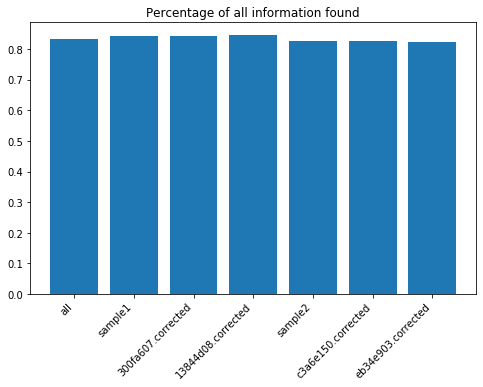

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
contigs = list()
ratios = list()
max_contigs = 29
num_contigs = 0
for (key, value) in sample_data.items():
    contigs.append(key)
    ratios.append(int(value['barcode_found']) / int(value['adapter_found']))
    num_contigs+=1
    if num_contigs >= max_contigs:
        break

ax.bar(range(len(contigs)), ratios, label=contigs)
ax.set_title('Percentage of all information found')
ax.set_xticks(range(len(contigs)))
ax.set_xticklabels(contigs, rotation=45, ha='right');
fig.savefig('comparison_information.png', dpi=200, bbox_inches = 'tight')

In [67]:
ratios

[0.8340469638945169,
 0.8430998934127573,
 0.8414311511562845,
 0.8446120648895558,
 0.824387640983283,
 0.8246841690012741,
 0.8240254992178463]

['all',
 'sample1',
 '300fa607.corrected',
 '13844d08.corrected',
 'sample2',
 'c3a6e150.corrected',
 'eb34e903.corrected']

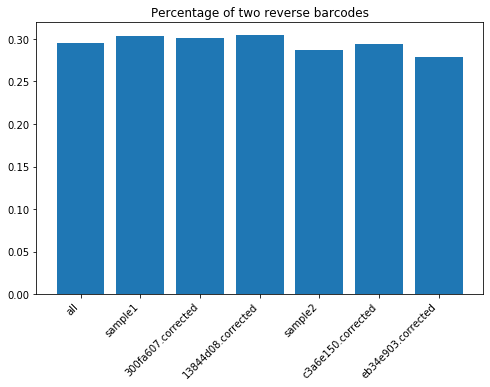

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
contigs = list()
ratios = list()
max_contigs = 29
num_contigs = 0
for (key, value) in sample_data.items():
    contigs.append(key)
    ratios.append(int(value['adapter_found']) / int(value['reads_seen']))
    num_contigs+=1
    if num_contigs >= max_contigs:
        break

ax.bar(range(len(contigs)), ratios, label=contigs)
ax.set_title('Percentage of two reverse barcodes')
ax.set_xticks(range(len(contigs)))
ax.set_xticklabels(contigs, rotation=45, ha='right');
fig.savefig('comparison_reverse_barcodes.png', dpi=200, bbox_inches = 'tight')
contigs

In [68]:
sample_data

{'all': OrderedDict([('contig', 'all'),
              ('reads_seen', '27808961'),
              ('adapter_found', '8200555'),
              ('adapter_not_found', '19502774'),
              ('adapter_in_both_ends', '99658'),
              ('multiple_adapters_in_end', '814'),
              ('reverse_adapter_alignment', '5160'),
              ('barcode_found', '6839648'),
              ('barcode_not_found', '1360907'),
              ('umi_found', '6838332'),
              ('umi_not_found', '0'),
              ('poly_t_found', '6791123'),
              ('poly_t_not_found', '34497'),
              ('sequence_too_short_for_umi', '1316'),
              ('sequence_too_short_for_poly_t', '12712'),
              ('forward_reverse_adapter_in_not_found', '1163617'),
              ('reverse_reverse_adapter_in_not_found', '1066113'),
              ('both_reverse_adapters_in_not_found', '17025089'),
              ('forward_reverse_adapter_in_forward_found', '240'),
              ('reverse_reverse_ada

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
contigs = list()
ratios = list()
max_contigs = 29
num_contigs = 0
for (key, value) in sample_data.items():
    contigs.append(key)
    ratios.append(int(value['both_reverse_adapters_in_not_found']) / int(value['reads_seen']))
    num_contigs+=1
    if num_contigs >= max_contigs:
        break

ax.bar(range(len(contigs)), ratios, label=contigs)
ax.set_title('Percentage of all information found')
ax.set_xticks(range(len(contigs)))
ax.set_xticklabels(contigs, rotation=45, ha='right');

In [122]:
int(csv_data['300fa607.corrected']['poly_t_found']) / int(csv_data['300fa607.corrected']['reads_seen'])

0.25180466722370803

In [123]:
int(csv_data['13844d08.corrected']['poly_t_found']) / int(csv_data['13844d08.corrected']['reads_seen'])

0.25510094031532227

# Barcode Histogram

In [54]:
barcode_histogram_data = []
filename = 'barcode_stats.tsv'
#filename = '/Users/mgatzen/data/longreads/lrma/tools/10x_tool/results/SM-HLD5O/remaining/rg_stats.tsv'
#with open('chr_stats.tsv') as csv_file:
with open(filename) as csv_file:
    reader = csv.DictReader(csv_file, delimiter='\t')
    for line in reader:
        barcode_histogram_data.append(int(line['occurrence']))

In [55]:
num_possible_barcodes = 0
with open('/Users/mgatzen/files/bam/10x_tool/barcodes.1.tsv') as barcodes_file:
    for line in barcodes_file:
        if line:
            num_possible_barcodes += 1

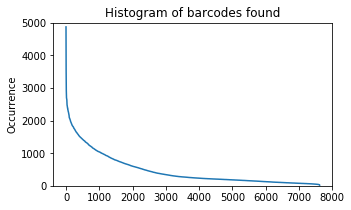

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))

barcode_histogram_data = sorted(barcode_histogram_data, reverse = True)

ax.plot(barcode_histogram_data)
ax.set_title('Histogram of barcodes found')
ax.set_ylim(0, 5000)
ax.set_ylabel('Occurrence')
fig.savefig('barcode_histogram.png', dpi=300, bbox_inches = 'tight')

In [48]:
print('Unique barcodes in provided list:  {}'.format(num_possible_barcodes))
print('Unique barcodes found in data:     {}'.format(len(barcode_histogram_data)))
print('Percentage of unique barcodes hit: {:.2f}%'.format(len(barcode_histogram_data) / num_possible_barcodes * 100))
print('Max unique barcode occurrence:     {}'.format(barcode_histogram_data[0]))
print('Min unique barcode occurrence:     {}'.format(barcode_histogram_data[-1]))


Unique barcodes in provided list:  7626
Unique barcodes found in data:     7626
Percentage of unique barcodes hit: 100.00%
Max unique barcode occurrence:     4872
Min unique barcode occurrence:     21


![sankey](results/pacbio/sankey.png "sankey")

## Using complete barcode list
### Increase of detected barcodes from 83% to 97%

![sankey_allbarcodes](results/pacbio/sankey_allbarcodes.png "sankey_allbarcodes")

In [120]:
barcode_histogram = dict()
barcode_umi_histogram = dict()
barcode_unique_umis = dict()
filename = 'results/ont/barcode_stats_1.consensus.bam.tsv'
#filename = '/Users/mgatzen/data/longreads/lrma/tools/10x_tool/results/SM-HLD5O/remaining/rg_stats.tsv'
#with open('chr_stats.tsv') as csv_file:
with open(filename) as csv_file:
    reader = csv.DictReader(csv_file, delimiter='\t')
    for line in reader:
        barcode = line['barcode']
        umi = line['umi']
        occurrence = int(line['occurrence'])
        if barcode not in barcode_histogram:
            barcode_histogram[barcode] = 0
        barcode_histogram[barcode] += occurrence
        if (barcode, umi) not in barcode_umi_histogram:
            barcode_umi_histogram[(barcode, umi)] = 0
            if barcode not in barcode_unique_umis:
                barcode_unique_umis[barcode] = 0
            barcode_unique_umis[barcode] += 1
        barcode_umi_histogram[(barcode, umi)] += occurrence
        

In [91]:
num_possible_barcodes = 0
with open('/Users/mgatzen/files/bam/10x_tool/barcodes/3M-february-2018.txt') as barcodes_file:
    for line in barcodes_file:
        if line:
            num_possible_barcodes += 1

### Barcodes

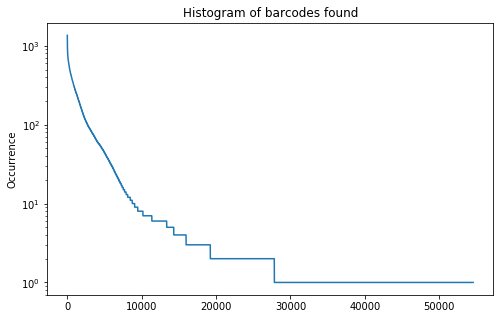

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

barcode_histogram_data = sorted(barcode_histogram.values(), reverse = True)

ax.plot(barcode_histogram_data)
ax.set_title('Histogram of barcodes found')
ax.set_yscale('log')
#ax.set_ylim(0, 3500)
ax.set_ylabel('Occurrence')
fig.savefig('barcode_histogram_bam1_allbarcodes.png', dpi=200, bbox_inches = 'tight')

In [93]:
print('Unique barcodes in provided list:  {}'.format(num_possible_barcodes))
print('Unique barcodes found in data:     {}'.format(len(barcode_histogram_data)))
print('Percentage of unique barcodes hit: {:.2f}%'.format(len(barcode_histogram_data) / num_possible_barcodes * 100))
print('Max unique barcode occurrence:     {}'.format(barcode_histogram_data[0]))
print('Min unique barcode occurrence:     {}'.format(barcode_histogram_data[-1]))

Unique barcodes in provided list:  6794880
Unique barcodes found in data:     54575
Percentage of unique barcodes hit: 0.80%
Max unique barcode occurrence:     1355
Min unique barcode occurrence:     1


## Barcodes & UMI

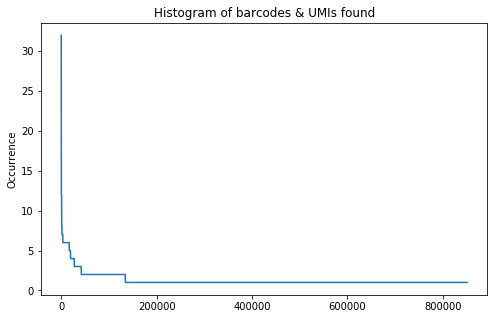

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

barcode_umi_histogram_data = sorted(barcode_umi_histogram.values(), reverse = True)

ax.plot(barcode_umi_histogram_data)
ax.set_title('Histogram of barcodes & UMIs found')
#ax.set_ylim(0, 3500)
ax.set_ylabel('Occurrence')
fig.savefig('barcode_umi_histogram_bam1_allbarcodes.png', dpi=200, bbox_inches = 'tight')

In [103]:
print('Unique barcodes & UMIs found in data: {:,}'.format(len(barcode_umi_histogram_data)))
print('Max unique barcode occurrence:        {}'.format(barcode_umi_histogram_data[0]))
print('Min unique barcode occurrence:        {}'.format(barcode_umi_histogram_data[-1]))

Unique barcodes & UMIs found in data: 850,794
Max unique barcode occurrence:        32
Min unique barcode occurrence:        1


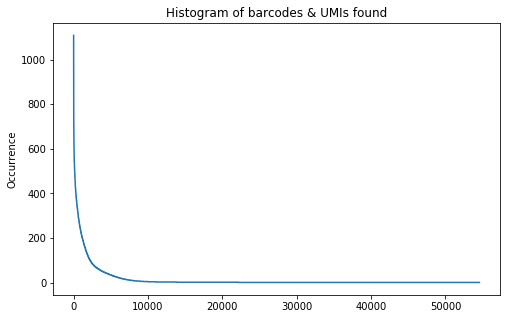

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

barcode_unique_umis_histogram_data = sorted(barcode_unique_umis.values(), reverse = True)

ax.plot(barcode_unique_umis_histogram_data)
ax.set_title('Histogram of barcodes & UMIs found')
#ax.set_ylim(0, 3500)
ax.set_ylabel('Occurrence')
fig.savefig('barcode_umi_histogram_bam1_allbarcodes.png', dpi=200, bbox_inches = 'tight')

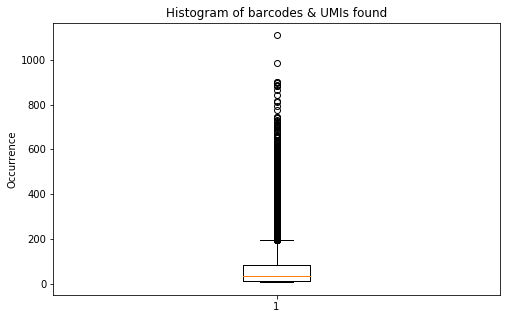

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

barcode_unique_umis_histogram_data = sorted(barcode_unique_umis.values(), reverse = True)

ax.boxplot(barcode_unique_umis_histogram_data[:10000])
ax.set_title('Histogram of barcodes & UMIs found')
#ax.set_ylim(0, 3500)
ax.set_ylabel('Occurrence')
fig.savefig('barcode_umi_histogram_bam1_allbarcodes.png', dpi=200, bbox_inches = 'tight')

# Sankeys

In [107]:
def sankey(margin_top=10, **value):
    """Show SankeyWidget with default values for size and margins"""
    return SankeyWidget(layout=Layout(width="1000", height="600"),
                        margins=dict(top=margin_top, bottom=0, left=100, right=200),
                        **value)


In [72]:

s = sankey(links=links_percentage, rank_sets=rank_sets, order=order, linkLabelFormat='.2f', linkLabelMinWidth=0)
s

SankeyWidget(layout=Layout(height='600', width='1000'), linkLabelFormat='.2f', linkLabelMinWidth=0.0, links=[{…

In [71]:

s = sankey(links=links, rank_sets=rank_sets, order=order, linkLabelFormat=',d', linkLabelMinWidth=0)
s

SankeyWidget(layout=Layout(height='600', width='1000'), linkLabelFormat=',d', linkLabelMinWidth=0.0, links=[{'…

In [114]:

s = sankey(links=links_reverse, order=order_reverse, rank_sets=rank_sets_reverse, linkLabelFormat=',d', linkLabelMinWidth=0)
s

SankeyWidget(layout=Layout(height='600', width='1000'), linkLabelFormat=',d', linkLabelMinWidth=0.0, links=[{'…